In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import time
print(tf.__version__)

1.15.2


In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist= input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
# some helper functions:-

In [0]:
# 1) initializing weights
def init_weights(shape):
    init_random_dist=tf.truncated_normal(shape,stddev=0.1)
    """Outputs random values from a truncated normal distribution.
    The generated values follow a normal distribution with specified mean and standard deviation, 
    except that values whose magnitude is more than 2 standard deviations from the mean are dropped 
    and re-picked."""
    """Normal distribution, also known as the Gaussian distribution, is a probability distribution that is 
    symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far 
    from the mean. In graph form, normal distribution will appear as a bell curve."""
    return tf.Variable(init_random_dist)

In [0]:
# 2) initializing bias
def init_bias(shape):
    init_bias_vals=tf.constant(0.1,shape=shape)          # all values are 0.1 and the shape is that of the tensor
    return tf.Variable(init_bias_vals)

In [0]:
# 3) convolutional func
def conv2d(x,W):
    # x is the input tensor.A 4d tensor. its shape:- [batch,height,width,channel]  (channel is 1 for grayscale and 3 for rgb)
    # batch basically tells which all images are being taken as i/p/. height and weight are of individual images. 
    # W is the kernel(or the filter).its shape:- [filter height,filter width,no. of channels as i/p, no. of channels as o/p ]
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')    
                        # basic 2d convolutional function

In [0]:
# 4) pooling
def max_pool_2by2(x):
    # x is the input tensor. its shape:- [batch,height,width,channel] 
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
                # pooling is done only along height and width. so, it is basically 2*2 pooling
                # ksize specifies the size of the window for each dimension of input tensor
                # stride specifies the stride of the sliding window for each dimension of input tensor

In [0]:
# convolutional layer
def convolutional_layer(input_x,shape):
    w=init_weights(shape)
    b=init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,w)+b)

In [0]:
# normal (or, fully connected) layer
def normal_full_layer(input_layer,size):
    input_size=int(input_layer.get_shape()[1])
    w=init_weights([input_size,size])
    b=init_bias([size])
    return tf.matmul(input_layer,w)+b

In [0]:
# placeholder
x=tf.placeholder(tf.float32,shape=[None,784])
y_true=tf.placeholder(tf.float32,shape=[None,10])

In [0]:
# layers
x_image= tf.reshape(x,[-1,28,28,1])   # converting the i/p img back to layers. The 28*28 is h*w. 1 is coz of grayscale.

In [0]:
# first convolutional layer
convo_1=convolutional_layer(x_image,shape=[5,5,1,32]) # the wt. tensor is [5,5,1,32]
                                                      # 5 by 5 convolutional layer. so, this convolution will compute
                                                      # 32 features for each 5 by 5 patch. 1 is the i/p channels.32 is the no.
                                                      # of o/p channels.

In [0]:
# first pooling layer
convo_1_pooling = max_pool_2by2(convo_1)

In [0]:
# second convolutional layer
convo_2 = convolutional_layer(convo_1_pooling,shape=[5,5,32,64])    # 64 features
convo_2_pooling= max_pool_2by2(convo_2)

In [0]:
#this o/p is now flattened out so that it gets connected to a fully connected layer
convo_2_flat= tf.reshape(convo_2_pooling,[-1,7*7*64])
#here 7*7 is dimension of each image. here's how:-
#28*28 on pooling with 2*2 gives 14*14
#14*14 on pooling with 2*2 gives 7*7
#NOTE:- the dimension of the image didn't change on convolution as "SAME" type of convolution is used.Meaning to say that the padding is such that the final
#       o/p dimension remains the same.here, padding=(f-1)/2=(5-1)/2=2 . so after padding , 28*28 becomes 32*32. and on convolution gives 28*28 
#       (as, n-f+1=32-5+1=28  )
full_layer_one=tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [0]:
# dropout
hold_prob= tf.placeholder(tf.float32)
full_one_dropout= tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
y_pred= normal_full_layer(full_one_dropout,10)    # 10 is the no. of labels

In [0]:
# loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train =  optimizer.minimize(cross_entropy)

In [0]:
init= tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

In [0]:
start = time.time()
steps=5000
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(steps):
        batch_x,batch_y= mnist.train.next_batch(50)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})   
                                    # hold_prob:0.5 implies every neuron has a 50% hold probablity
        if(i%100==0):
            print("On Step: {}".format(i))
            print("Accuracy:  ")
            matches=tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
            #argmax(input, axis=None, name=None, dimension=None) Returns the index with the largest value across axis of a tensor
            
            acc=tf.reduce_mean(tf.cast(matches,tf.float32))
            print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels,hold_prob:1.0}))
            # during testing we don't want to dropout any of the neurons. So, we write hold_prob:1.0 , meaning that every neuron will be held at its 
            # position and none will be dropped out
            print('\n')

            saver.save(sess,'model_char_recog.ckpt')
end = time.time()

On Step: 0
Accuracy:  
0.1294


On Step: 100
Accuracy:  
0.9433


On Step: 200
Accuracy:  
0.96


On Step: 300
Accuracy:  
0.971


On Step: 400
Accuracy:  
0.9724


On Step: 500
Accuracy:  
0.9785


On Step: 600
Accuracy:  
0.982


On Step: 700
Accuracy:  
0.9836


On Step: 800
Accuracy:  
0.9803


On Step: 900
Accuracy:  
0.9837


On Step: 1000
Accuracy:  
0.9823


On Step: 1100
Accuracy:  
0.9861


On Step: 1200
Accuracy:  
0.9858


On Step: 1300
Accuracy:  
0.9859


On Step: 1400
Accuracy:  
0.9848


On Step: 1500
Accuracy:  
0.9885


On Step: 1600
Accuracy:  
0.9894


On Step: 1700
Accuracy:  
0.9848


On Step: 1800
Accuracy:  
0.9862


On Step: 1900
Accuracy:  
0.9893


On Step: 2000
Accuracy:  
0.988


On Step: 2100
Accuracy:  
0.9883


On Step: 2200
Accuracy:  
0.9886


On Step: 2300
Accuracy:  
0.9863


On Step: 2400
Accuracy:  
0.9898


On Step: 2500
Accuracy:  
0.9887


On Step: 2600
Accuracy:  
0.9895


On Step: 2700
Accuracy:  
0.9885


On Step: 2800
Accuracy:  
0.99


On S

In [0]:
# predicting on single examples
import matplotlib.pyplot as plt
%matplotlib inline

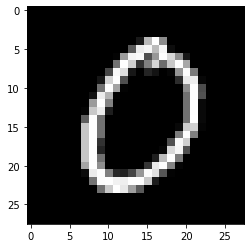

In [0]:
image_index = 4444
single_image = mnist.train.images[image_index].reshape(28,28) 
plt.imshow(single_image,cmap='gist_gray') 

In [0]:
with tf.Session() as sess:
  sess.run(init)
  saver.restore(sess, "model_char_recog.ckpt")
       
  single_image = mnist.train.images[image_index]     
  prediction=tf.argmax(y_pred,1)
  var = prediction.eval(feed_dict={x: [single_image],y_true:mnist.train.labels,hold_prob: 1.0}, session=sess)
  print("The predicted character is :- " + str(var))

INFO:tensorflow:Restoring parameters from model_char_recog.ckpt
The predicted character is :- [0]
